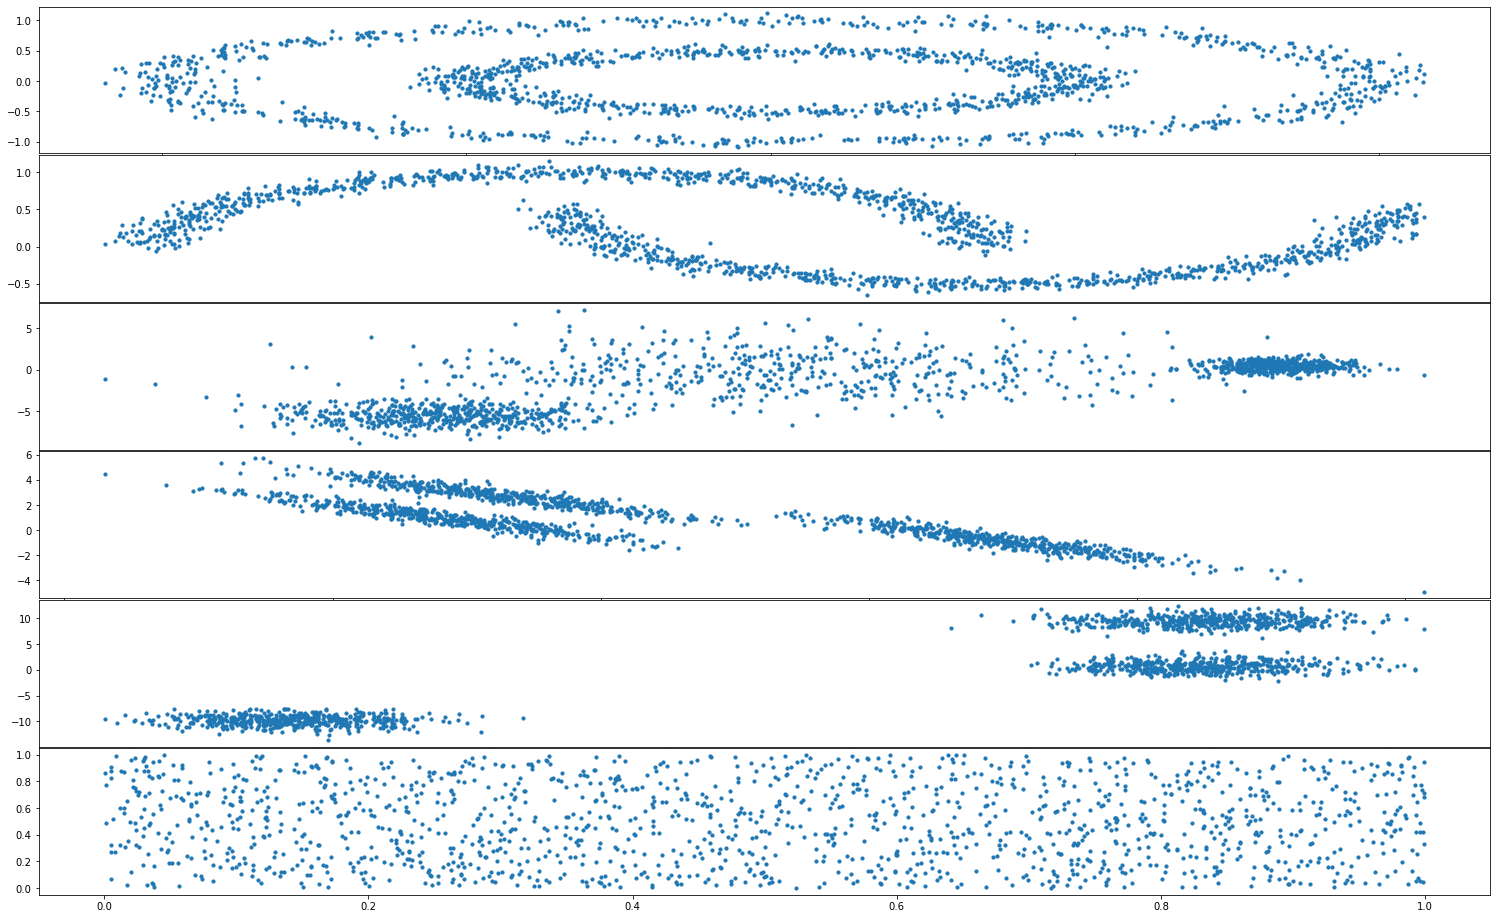

In [8]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

plot_num = 1
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    plt.subplot(len(datasets), 1, plot_num)
    X, y = dataset
    plt.scatter(X[:,0], X[:,1], s=10)
    plot_num += 1

In [5]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [16]:
(X, _), _ = datasets[-2]

In [21]:
tx = X[:30]

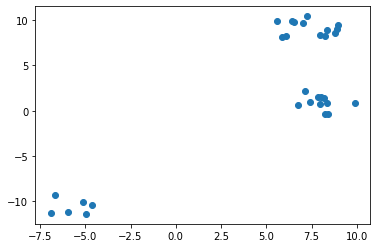

In [22]:

plt.scatter(tx[:,0], tx[:,1])

In [26]:
db = set(tuple(x) for x in tx)
    

In [ ]:
outputs = []
for i in range(len(db)):
    p = db.pop()
    distances = get_distances(p, db)
    if i == 0:
        outputs.append((p, 0))
    p = distance[0]
    outputs.append(p)
    
    

In [61]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.reachability_distance = None
        self.processed = None

In [28]:
a

array([[ 1,  1],
       [ 0,  2],
       [-3,  5]])

In [27]:
a = np.array([(1,1), (0,2), (-3,5)])

In [31]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1], [5,8]])
pairwise_distances(X, Y)

array([[3.16227766, 2.        , 5.83095189],
       [5.38516481, 4.12310563, 3.60555128],
       [8.94427191, 7.61577311, 0.        ]])

In [35]:
X.tolist().index([3,5])

1

In [40]:
distances[1]

array([2.23606798, 0.        , 3.60555128])

In [50]:
tab = [1,2,3,4,5,5]

In [51]:
tab[1:5+1]

[2, 3, 4, 5, 5]

In [70]:
distances = pairwise_distances(X, X)

def getNeighbours(p, eps):
    ind = X.tolist().index((p.x, p.y))
    pdivec = distances[ind]
    pdivec = pdivec[pdivec]
    srtd = sorted(pdivec)
    return srtd[1:]

def core_distance(p, eps, MinPts):
    srtd = getNeighbours(p, eps)
    neigh = srtd[:MinPts]
    n = neigh[-1]
    if n>eps:
        return None
    else:
        return n
        
def dist(p,o):
    return np.sum(np.sqrt((o-p)**2))
    
    
    

In [ ]:
def update(N, p, Seeds, eps, MinPts) is
    coredist = core_distance(p, eps, MinPts)
    for o in N:
        if not o.processed:
            new_reach_dist = max(coredist, dist(p,o))
            if o.reachability_distance == None:
                o.reachability_distance = new_reach_dist
                Seeds[o] = new_reach_dist
            else:
                if new_reach_dist < o.reachability_distance:
                    o.reachability_distance = new_reach_dist
                    Seeds[o] = new_reach_dist

In [65]:
ordered_list = []
def OPTICS(DB, eps, MinPts):
    for p in DB:
        if p.processed:
            continue
        N = getNeighbors(p, eps)
        p.processed = True
        ordered_list.append(p)
        if core_distance(p, eps, MinPts) != None:
            Seeds = {}
            update(N, p, Seeds, eps, MinPts)
            for q,dist in Seeds:
                Nprim = getNeighbors(q, eps)
                q.processed = True
                ordered_list.append(q)
                if core_distance(q, eps, MinPts) != None:
                    update(Nprim, q, Seeds, eps, MinPts)

In [66]:
db = [Point(x,y) for x,y in X]

In [67]:
X

array([[2, 3],
       [3, 5],
       [5, 8]])

In [68]:
OPTICS(db, 1.4, 2)

NameError: name 'getNeighbors' is not defined